# **3.1 Dataset Selection**

**World Development Indicators:** [Dataset](https://databank.worldbank.org/source/world-development-indicators)

# **3.2 Problem Definition:**

**Independent Variable (Predictor):**

Political Stability Index (PV.EST)
(Measures the stability of a country’s political environment).


**Dependent Variable (Outcome):**

Foreign Direct Investment, Net Inflows (% of GDP) (BX.KLT.DINV.WD.GD.ZS)
(Measures how much foreign investment a country attracts relative to its GDP).

#**Political Stability and Prosperity: A Data-Driven Analysis**

**Research Question:**
***"Is political stability linked to higher foreign investment?"***

#**Hypotheses**

**Null Hypothesis (H0):**
Political stability has no significant effect on foreign direct investment.

**Alternative Hypothesis (Ha):**
Political stability has a significant positive effect on foreign direct investment.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import pearsonr

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#**3.3 Data Analysis & Visualization:**

**Dataset Loading**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/World_Development_Indicators.csv')

In [5]:
df.shape

(18359, 24)

In [6]:
df.head()

,Country Name,Country Code,Series Name,Series Code,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,71.5821433759539,76.4387030058668,83.0740187275294,105.021064735005,97.8679108385313,100,...,132.883209191418,138.708665508891,145.610741438593,146.522481857209,149.895975208032,158.292979728016,166.418480358434,189.23795275112,180.44840108089,168.536667139799
1,Afghanistan,AFG,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,75.85,72.48,82.92,72.17,91.03,87.58,...,95.65,104.04,99.21,94.89,115.78,121.77,125.67,121.34,..,..
2,Afghanistan,AFG,Export unit value index (2015 = 100),TX.UVI.MRCH.XD.WD,80.6,89.4,102.7,112.6,100.9,115.5,...,100,105.9,109.3,113.3,102.8,114.8,127.3,146.5,143.3,..
3,Afghanistan,AFG,Export value index (2015 = 100),TX.VAL.MRCH.XD.WD,64.3,71.3,74.4,87.2,56.9,57.2,...,100,105.6,133.9,161.8,160.8,144.2,158.2,152.1,163.8,..
4,Afghanistan,AFG,Export volume index (2015 = 100),TX.QTY.MRCH.XD.WD,79.8,79.8,72.4,77.4,56.4,49.5,...,100,99.7,122.4,142.8,156.3,125.6,124.4,103.9,114.3,..


**Data Filtering**

In [7]:
df.isnull().sum()

,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2005 [YR2005],5
2006 [YR2006],5
2007 [YR2007],5
2008 [YR2008],5
2009 [YR2009],5
2010 [YR2010],5


In [8]:
df_clean=df.dropna()
df_clean.shape

(18354, 24)

In [9]:
df_clean.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
2005 [YR2005],0
2006 [YR2006],0
2007 [YR2007],0
2008 [YR2008],0
2009 [YR2009],0
2010 [YR2010],0


In [10]:
df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]',
       '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
       '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
       '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]'],
      dtype='object')

In [11]:
df_long = df_clean.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                  var_name='Year',
                  value_name='Value')

df_long.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,2005 [YR2005],71.5821433759539
1,Afghanistan,AFG,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,2005 [YR2005],75.85
2,Afghanistan,AFG,Export unit value index (2015 = 100),TX.UVI.MRCH.XD.WD,2005 [YR2005],80.6
3,Afghanistan,AFG,Export value index (2015 = 100),TX.VAL.MRCH.XD.WD,2005 [YR2005],64.3
4,Afghanistan,AFG,Export volume index (2015 = 100),TX.QTY.MRCH.XD.WD,2005 [YR2005],79.8


In [12]:
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

display(df_long.head())

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,2005,71.582143
1,Afghanistan,AFG,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,2005,75.850000
2,Afghanistan,AFG,Export unit value index (2015 = 100),TX.UVI.MRCH.XD.WD,2005,80.600000
3,Afghanistan,AFG,Export value index (2015 = 100),TX.VAL.MRCH.XD.WD,2005,64.300000
4,Afghanistan,AFG,Export volume index (2015 = 100),TX.QTY.MRCH.XD.WD,2005,79.800000


In [13]:
# Filter for the relevant indicator
political_stability_df = df_long[df_long['Series Name'] == 'Political Stability and Absence of Violence/Terrorism: Estimate'].copy()

display(political_stability_df.head())

,Country Name,Country Code,Series Name,Series Code,Year,Value
32,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,2005,-2.067510
101,Albania,ALB,Political Stability and Absence of Violence/Te...,PV.EST,2005,-0.505048
170,Algeria,DZA,Political Stability and Absence of Violence/Te...,PV.EST,2005,-0.913666
239,American Samoa,ASM,Political Stability and Absence of Violence/Te...,PV.EST,2005,0.746284
308,Andorra,AND,Political Stability and Absence of Violence/Te...,PV.EST,2005,1.384927


In [14]:
# Pivot the data for easier analysis
political_stability_pivot = political_stability_df.pivot_table(index='Country Name',
                                                               columns='Year',
                                                               values='Value')

In [15]:
# Filter for the relevant indicator (FDI)
fdi_df = df_long[df_long['Series Name'] == 'Foreign direct investment, net inflows (% of GDP)'].copy()

display(fdi_df.head())

,Country Name,Country Code,Series Name,Series Code,Year,Value
48,Afghanistan,AFG,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,2005,4.368673
117,Albania,ALB,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,2005,3.178998
186,Algeria,DZA,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,2005,1.079903
255,American Samoa,ASM,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,2005,NaN
324,Andorra,AND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,2005,NaN


In [16]:
# Pivot the data for easier analysis
fdi_pivot = fdi_df.pivot_table(index='Country Name',
                               columns='Year',
                               values='Value')


#**To Find min, max, mean, std and also to check for outliers or unusual values.**

In [17]:
political_stability_pivot.describe()

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,201.000000,202.000000,202.000000,203.000000,204.000000,204.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,-0.022641,-0.023472,-0.022597,-0.020549,-0.027940,-0.033424,-0.031282,-0.030006,-0.028475,-0.024850,-0.026591,-0.025961,-0.025669,-0.034222,-0.034531,-0.035217,-0.035258,-0.035477,-0.027372
std,1.004189,1.003161,1.003880,1.005384,1.007303,1.000941,0.998179,0.999821,1.001067,1.001481,0.999693,1.000762,1.000878,1.001815,0.999925,0.998697,0.998937,0.998603,1.000556
min,-2.705590,-2.826402,-3.228497,-3.280517,-3.312951,-3.130971,-3.083847,-2.860755,-2.758687,-2.748824,-2.965177,-2.906036,-2.934317,-2.996235,-2.771014,-2.711848,-2.727339,-2.776898,-2.750607
25%,-0.782739,-0.736241,-0.661469,-0.657102,-0.665882,-0.718850,-0.708380,-0.680454,-0.665950,-0.643627,-0.619956,-0.628554,-0.642760,-0.640142,-0.577341,-0.610105,-0.627814,-0.615027,-0.521786
50%,0.085603,0.101034,0.183067,0.118725,0.105565,0.051369,0.021105,0.079325,0.065314,0.049136,0.035213,0.052190,0.048514,0.013894,0.027658,0.016718,0.035331,0.043973,0.069302
75%,0.875413,0.859174,0.787584,0.811134,0.806966,0.798065,0.912176,0.893706,0.894792,0.806274,0.847117,0.834964,0.783372,0.823102,0.801569,0.837047,0.832015,0.789451,0.763501
max,1.594947,1.501111,1.488697,1.511940,1.553164,1.645201,1.940006,1.934407,1.931953,1.924541,1.947082,1.964211,1.927584,1.936804,1.887363,1.910595,1.877587,1.660742,1.625601


In [18]:
fdi_pivot.describe()

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,238.000000,239.000000,241.000000,242.000000,242.000000,241.000000,243.000000,243.000000,243.000000,244.000000,242.000000,241.000000,241.000000,241.000000,239.000000,239.000000,240.000000,239.000000,236.000000,136.000000
mean,5.944341,14.659727,13.993642,9.812242,10.573739,10.555918,11.182638,10.842080,8.208703,9.840260,17.739125,8.485800,8.457469,0.670109,7.773958,2.671286,6.147533,2.203376,3.153753,4.236123
std,22.604422,84.575417,68.292233,35.744738,54.761654,51.158453,57.064424,50.918764,51.432083,66.745861,137.224384,62.855916,45.143238,92.097184,35.082736,25.980596,28.701426,30.929106,12.092372,15.805484
min,-8.804936,-6.221490,-57.532314,-6.549732,-3.482045,-15.885438,-5.179040,-12.033180,-5.655618,-8.261019,-7.418557,-37.172653,-41.650995,-1303.108267,-13.674036,-296.013199,-15.121443,-444.706890,-71.719467,-14.708707
25%,1.518191,2.005121,2.511457,2.520335,1.525264,1.687783,1.866232,1.560224,1.434747,1.369289,1.249618,1.397506,1.537521,1.187104,1.362335,0.663284,1.436251,1.221365,0.717786,0.701312
50%,2.921040,3.677271,4.495417,3.824474,2.746755,2.930410,3.218660,2.791457,2.850557,2.552040,2.701035,2.739903,2.651415,2.314587,2.388496,1.704829,2.706077,2.259507,1.903532,1.740657
75%,5.600209,7.232493,8.654718,7.961528,5.450169,5.592659,6.173205,5.948393,4.786671,4.379341,4.930208,5.021740,4.550256,3.941183,4.248640,3.656095,4.651217,4.507132,3.753439,3.710631
max,341.007652,1114.932386,728.865660,426.427221,664.573767,587.838616,743.700703,540.366946,792.319802,1009.031051,1709.827232,972.693539,602.374526,452.221040,431.788470,191.860528,433.750961,126.084088,113.224329,174.827688


In [19]:
# Rename columns before merging
political_stability_df = political_stability_df.rename(columns={'Value': 'Political_Stability'})
fdi_df = fdi_df.rename(columns={'Value': 'FDI'})

In [20]:
merged_df = political_stability_df.merge(fdi_df, on=['Country Name','Country Code','Year'], suffixes=('_stability','_fdi'))
merged_df.head()

,Country Name,Country Code,Series Name_stability,Series Code_stability,Year,Political_Stability,Series Name_fdi,Series Code_fdi,FDI
0,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,2005,-2.067510,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,4.368673
1,Albania,ALB,Political Stability and Absence of Violence/Te...,PV.EST,2005,-0.505048,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,3.178998
2,Algeria,DZA,Political Stability and Absence of Violence/Te...,PV.EST,2005,-0.913666,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,1.079903
3,American Samoa,ASM,Political Stability and Absence of Violence/Te...,PV.EST,2005,0.746284,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN
4,Andorra,AND,Political Stability and Absence of Violence/Te...,PV.EST,2005,1.384927,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN


In [21]:
merged_df.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name_stability,0
Series Code_stability,0
Year,0
Political_Stability,1439
Series Name_fdi,0
Series Code_fdi,0
FDI,610


In [22]:
merged_df['Political_Stability'] = merged_df['Political_Stability'].fillna(
    merged_df['Political_Stability'].mean()
)
merged_df['FDI'] = merged_df['FDI'].fillna(
    merged_df['FDI'].mean()
)


In [23]:
merged_df.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name_stability,0
Series Code_stability,0
Year,0
Political_Stability,0
Series Name_fdi,0
Series Code_fdi,0
FDI,0


In [49]:
merged_df.to_csv("merged_df.csv", index=False)
import os
print(os.listdir())  # check if file is there


['.config', 'drive', 'merged_df.csv', 'sample_data']


### Data Analysis Key Findings

*   The median political stability scores and the median FDI percentages varied significantly among the selected countries (United States, China, India, Brazil, Germany, Nigeria, Nepal).
*   Some countries exhibited a wider spread in political stability scores, indicating higher volatility, while others were more stable. Similarly, the spread of FDI percentages varied, suggesting different levels of consistency in attracting foreign investment.
*   Outliers were observed in both political stability and FDI data for some countries, indicating periods of unusual fluctuations.
*   While a simple linear relationship was not immediately apparent, some countries with higher median political stability appeared to have higher or more consistent median FDI, and vice versa. However, exceptions were noted, suggesting other factors influence the relationship.


**EDA & Visualization:**

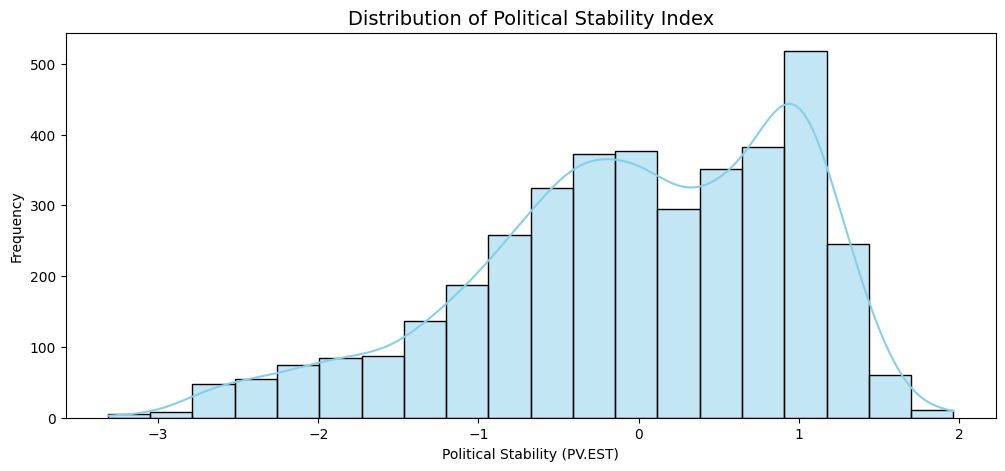

In [24]:
#Distribution of Political Stability
plt.figure(figsize=(12,5))
sns.histplot(political_stability_df['Political_Stability'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Political Stability Index', fontsize=14)
plt.xlabel('Political Stability (PV.EST)')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of the Political Stability Index. The distribution appears roughly symmetrical, centered around zero, which indicates that political stability is evenly distributed across the countries and years in the dataset.

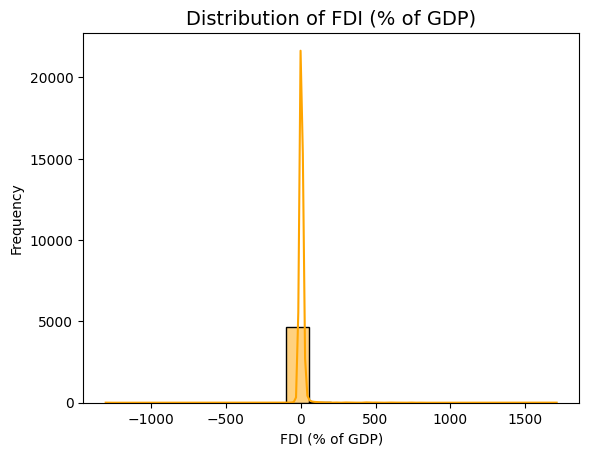

In [25]:
#Distribution of FDIplt.figure(figsize=(8,5))
sns.histplot(fdi_df['FDI'], kde=True, bins=20, color='orange')
plt.title('Distribution of FDI (% of GDP)', fontsize=14)
plt.xlabel('FDI (% of GDP)')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of FDI (% of GDP). The distribution is heavily skewed to the right, with a large number of observations clustered near zero and a long tail extending to the right. This indicates that while most countries have relatively low FDI, a few countries attract exceptionally high levels of foreign investment.

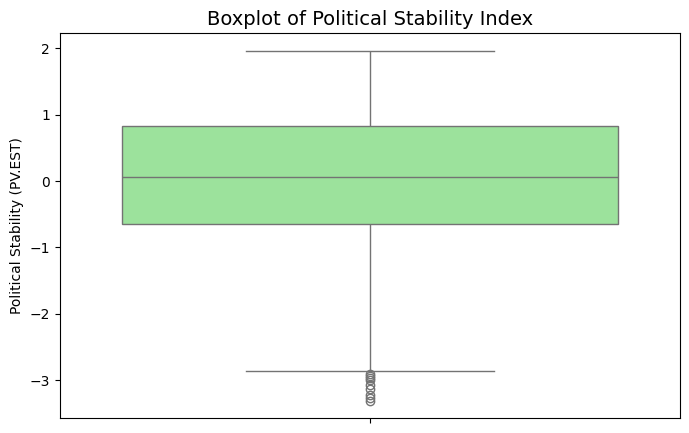

In [26]:
#Boxplot for Political Stability
plt.figure(figsize=(8,5))
sns.boxplot(y=political_stability_df['Political_Stability'], color='lightgreen')
plt.title('Boxplot of Political Stability Index', fontsize=14)
plt.ylabel('Political Stability (PV.EST)')
plt.show()

### Political Stability Distribution

This boxplot shows the distribution of the Political Stability Index across different countries and years.
From the plot, it appears that the political stability scores vary, and there are some potential **outliers**, particularly on the lower end.
Since our research question is **"Is political stability linked to higher foreign investment?"**, this chart helps visualize the distribution and spread of our independent variable, which is relevant for our analysis.

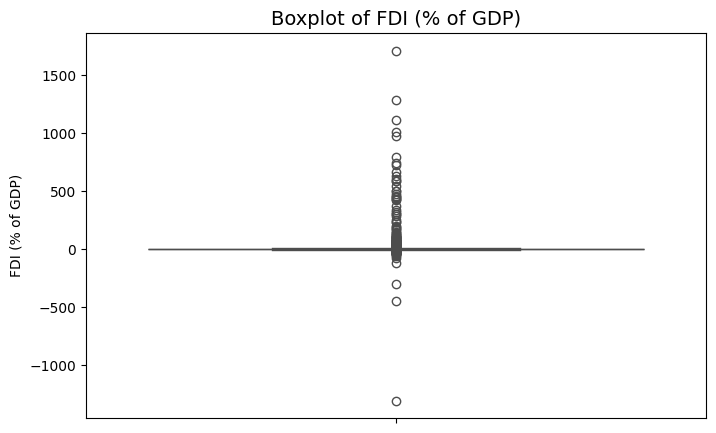

In [27]:
#Boxplot for FDI
plt.figure(figsize=(8,5))
sns.boxplot(y=fdi_df['FDI'], color='orange')
plt.title('Boxplot of FDI (% of GDP)', fontsize=14)
plt.ylabel('FDI (% of GDP)')
plt.show()

### FDI Distribution

This boxplot shows the distribution of Foreign Direct Investment (FDI) (% of GDP) across different countries and years.
From the plot, it appears that FDI varies significantly, with a large number of **outliers**, particularly on the higher end.

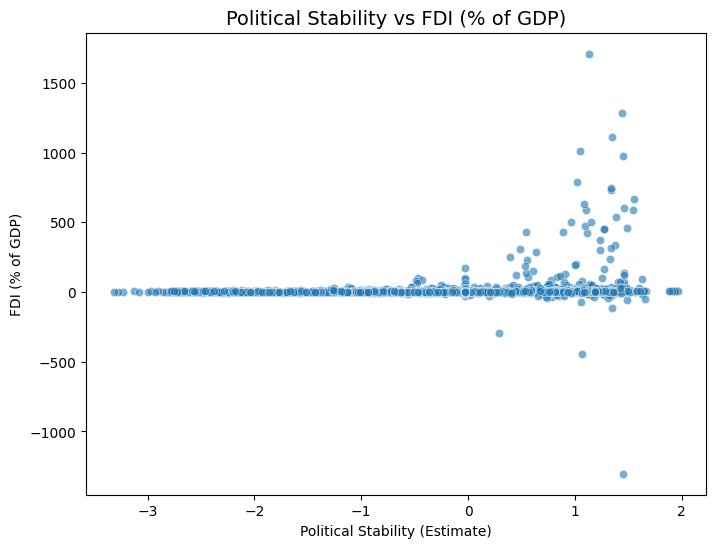

In [28]:

#Scatter plot to see relationship

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='Political_Stability', y='FDI', alpha=0.6)
plt.title('Political Stability vs FDI (% of GDP)', fontsize=14)
plt.xlabel('Political Stability (Estimate)')
plt.ylabel('FDI (% of GDP)')
plt.show()

This scatter plot visualizes the relationship between Political Stability and Foreign Direct Investment (FDI) (% of GDP). Each point represents a country-year observation. The plot shows a general trend where higher political stability (moving to the right on the x-axis) is associated with higher FDI (moving upwards on the y-axis), but there is a significant amount of scatter, indicating that the relationship is not perfectly linear. Notably, there are many **outliers** with very high FDI values, particularly at higher levels of political stability. These outliers suggest that while stability may be a factor, other influences can lead to exceptionally high foreign investment in certain cases.

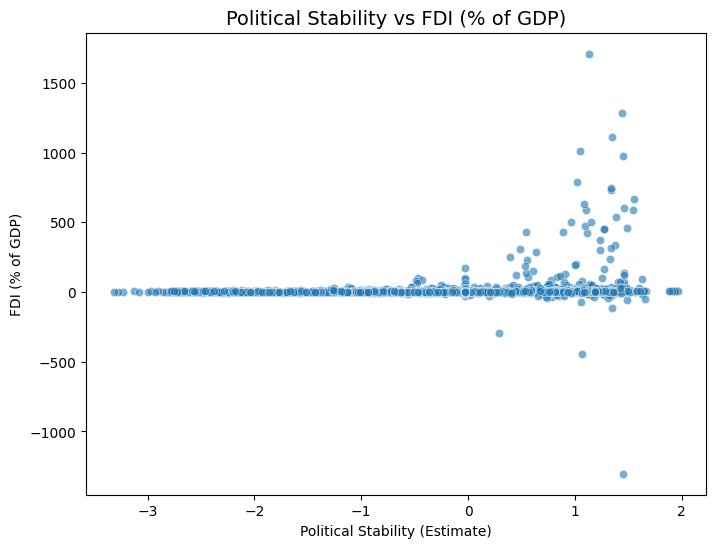

In [29]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='Political_Stability', y='FDI', alpha=0.6)
plt.title('Political Stability vs FDI (% of GDP)', fontsize=14)
plt.xlabel('Political Stability (Estimate)')
plt.ylabel('FDI (% of GDP)')
plt.show()

This scatter plot visualizes the relationship between Political Stability and Foreign Direct Investment (FDI) (% of GDP). Each point represents a country-year observation. The plot shows a general trend where higher political stability (moving to the right on the x-axis) is associated with higher FDI (moving upwards on the y-axis), but there is a significant amount of scatter, indicating that the relationship is not perfectly linear. Notably, there are many **outliers** with very high FDI values, particularly at higher levels of political stability. These outliers suggest that while stability may be a factor, other influences can lead to exceptionally high foreign investment in certain cases.

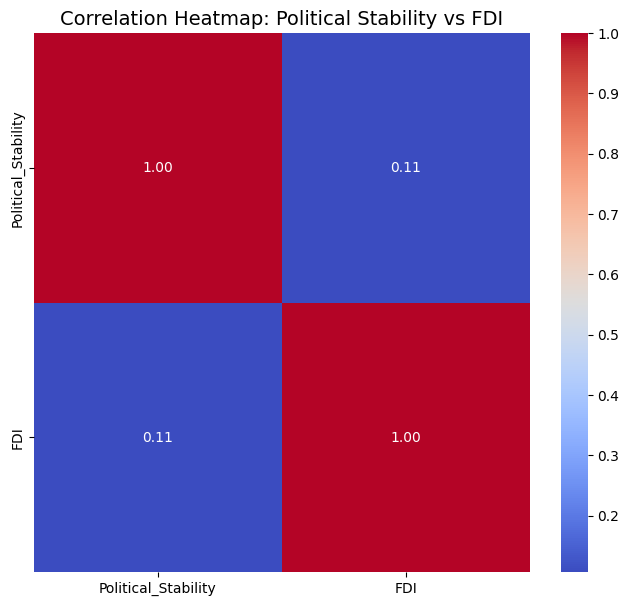

In [30]:
# Compute correlation matrix
corr = merged_df[['Political_Stability','FDI']].corr()

plt.figure(figsize=(8,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Political Stability vs FDI', fontsize=14)
plt.show()

This heatmap shows the correlation matrix between Political Stability and FDI (% of GDP). The value in each cell represents the Pearson correlation coefficient between the two variables. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates a weak correlation. This heatmap helps visualize the strength and direction of the linear relationship between political stability and FDI.

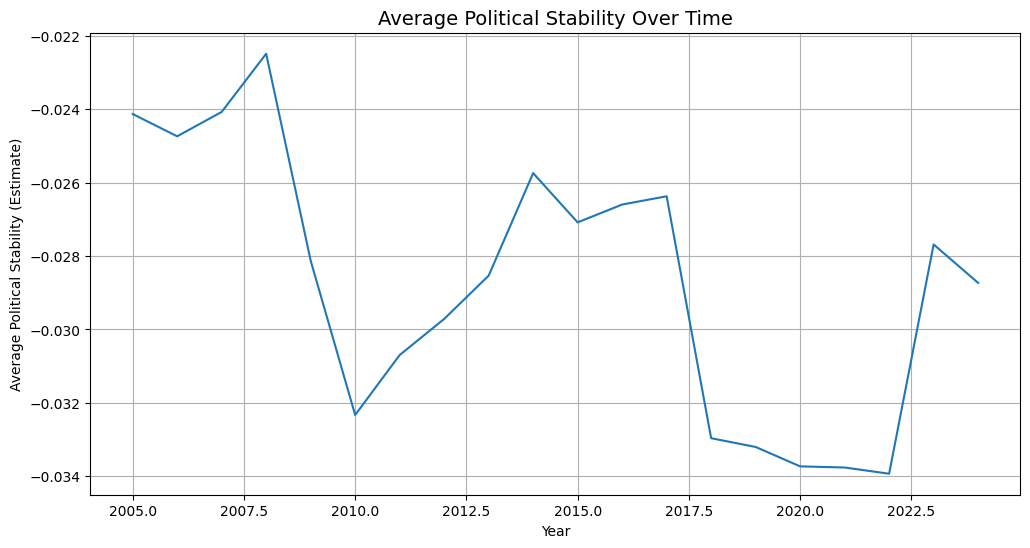

In [31]:
# Calculate the average political stability and FDI for each year
yearly_trends = merged_df.groupby('Year')[['Political_Stability', 'FDI']].mean().reset_index()

# Plot the time series for Political Stability
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Year', y='Political_Stability')
plt.title('Average Political Stability Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Political Stability (Estimate)')
plt.grid(True)
plt.show()

This line plot shows the trend of the average Political Stability Index across all countries over time. It allows us to observe how political stability has changed year by year, identifying any general patterns or significant shifts in stability over the period.

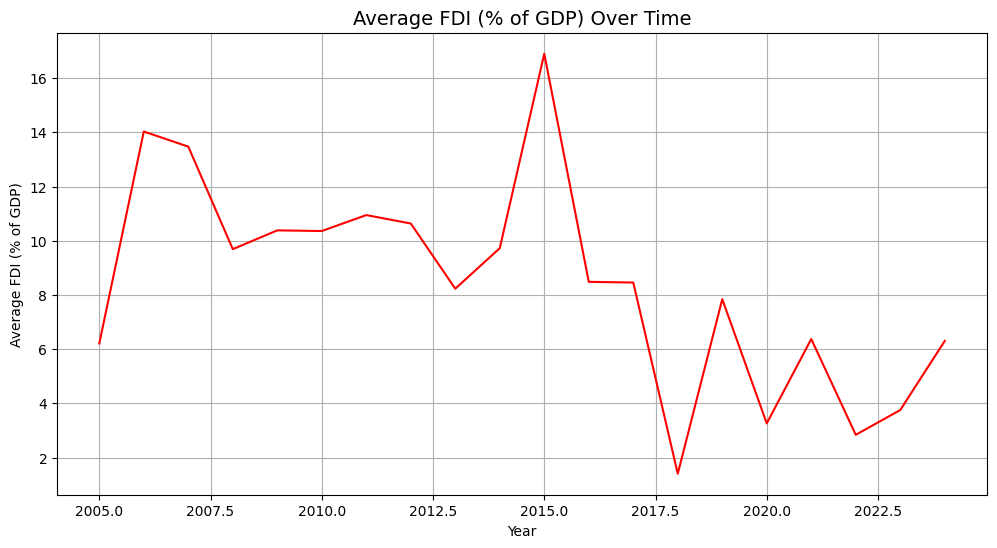

In [32]:
# Plot the time series for FDI
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Year', y='FDI', color='red')
plt.title('Average FDI (% of GDP) Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average FDI (% of GDP)')
plt.grid(True)
plt.show()

This line plot shows the trend of the average Foreign Direct Investment (FDI) (% of GDP) across all countries over time. It allows us to observe how FDI has changed year by year, identifying any general patterns or significant shifts in foreign investment over the period.

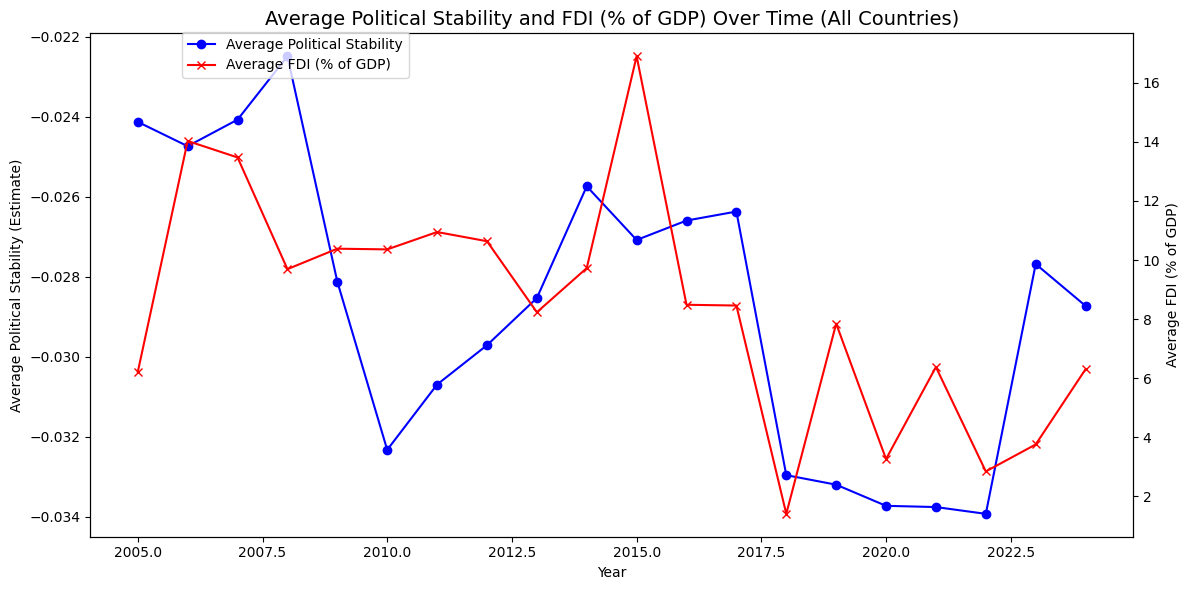

In [33]:
# Plot Political Stability on the first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(yearly_trends['Year'], yearly_trends['Political_Stability'], color='blue', marker='o', label='Average Political Stability')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Political Stability (Estimate)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Created a second y-axis for FDI
ax2 = ax1.twinx()
ax2.plot(yearly_trends['Year'], yearly_trends['FDI'], color='red', marker='x', label='Average FDI (% of GDP)')
ax2.set_ylabel('Average FDI (% of GDP)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Average Political Stability and FDI (% of GDP) Over Time (All Countries)', fontsize=14)
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.95))
plt.show()

This dual-axis line plot shows the average Political Stability Index and the average Foreign Direct Investment (FDI) (% of GDP) across all countries over time on the same figure, using separate y-axes to accommodate their different scales. The blue line represents the average political stability, and the red line represents the average FDI. By visualizing both trends together, we can observe if there are any co-movements or divergences between political stability and FDI over the years. While there isn't a perfectly aligned trend, there are periods where both average stability and FDI show similar movements, and other periods where they diverge, suggesting a complex relationship influenced by various factors.

In [34]:
# Subset of countries choosen.
selected_countries = ['United States', 'China', 'India', 'Brazil', 'Germany', 'Nigeria', 'Nepal']

# Filtering the merged_df to include only the selected countries
subset = merged_df[merged_df['Country Name'].isin(selected_countries)].copy()

display(subset.head())

,Country Name,Country Code,Series Name_stability,Series Code_stability,Year,Political_Stability,Series Name_fdi,Series Code_fdi,FDI
26,Brazil,BRA,Political Stability and Absence of Violence/Te...,PV.EST,2005,-0.263380,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,1.733894
41,China,CHN,Political Stability and Absence of Violence/Te...,PV.EST,2005,-0.501757,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,4.492185
73,Germany,DEU,Political Stability and Absence of Violence/Te...,PV.EST,2005,0.888915,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,2.067994
89,India,IND,Political Stability and Absence of Violence/Te...,PV.EST,2005,-1.013880,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.886098
138,Nepal,NPL,Political Stability and Absence of Violence/Te...,PV.EST,2005,-2.098405,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.030156


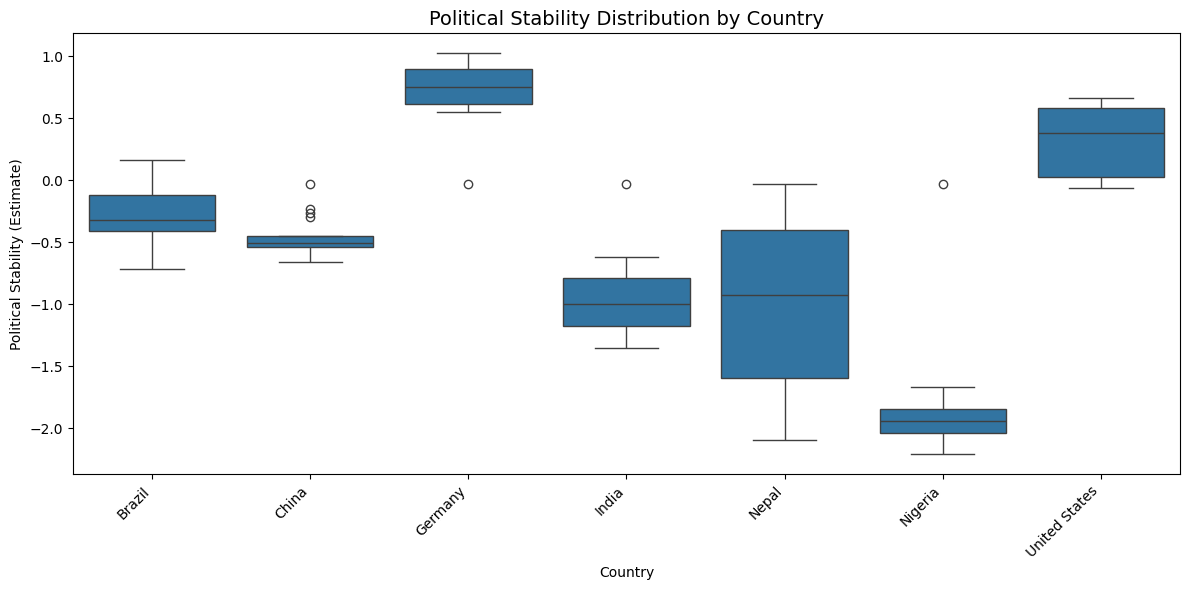

In [35]:
# Creating box plots for political stability

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='Country Name', y='Political_Stability')
plt.title('Political Stability Distribution by Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Political Stability (Estimate)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This boxplot shows the distribution of the Political Stability Index for the selected countries. Each box represents the interquartile range of political stability scores for a specific country across the years. The line within the box indicates the median stability score for that country, and the whiskers show the range of most of the data. Any points beyond the whiskers are considered outliers. This plot allows us to compare the typical political stability levels and their variability among the selected countries.

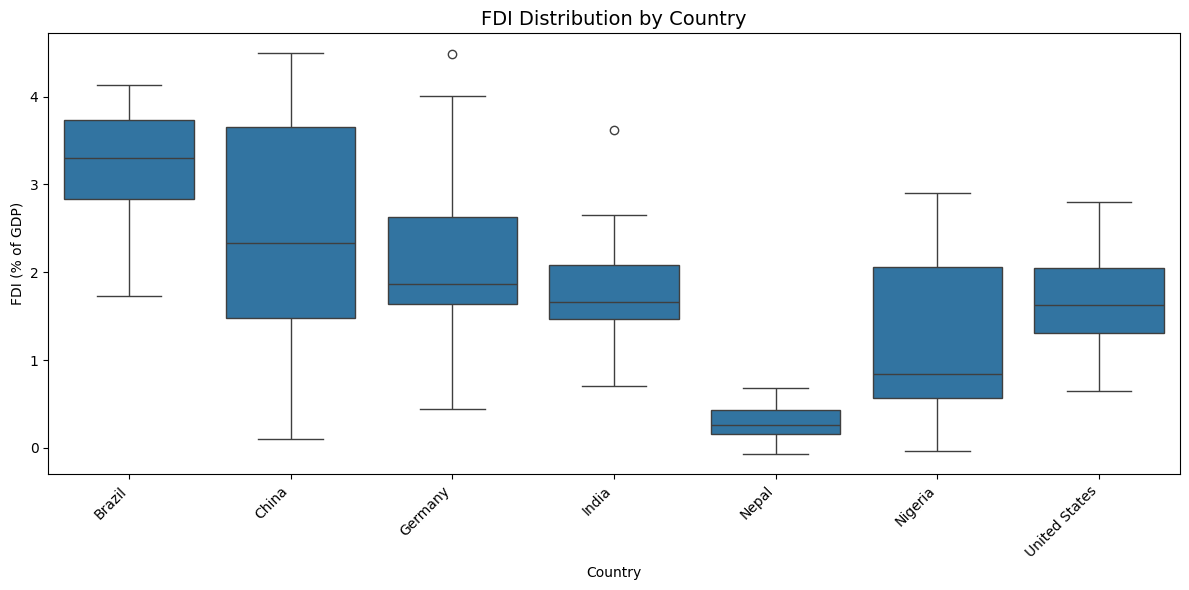

In [36]:
# Create box plots for fdi

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='Country Name', y='FDI')
plt.title('FDI Distribution by Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('FDI (% of GDP)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This boxplot shows the distribution of Foreign Direct Investment (FDI) (% of GDP) for the selected countries. Each box represents the interquartile range of FDI values for a specific country across the years. The line within the box indicates the median FDI for that country, and the whiskers show the range of most of the data. Any points beyond the whiskers are considered outliers. This plot allows us to compare the typical FDI levels and their variability among the selected countries.

In [37]:
# Median split for Political Stability
merged_df['Stability_Group'] = merged_df['Political_Stability'].apply(
    lambda x: 'High Stability' if x > merged_df['Political_Stability'].median() else 'Low Stability')

merged_df['Stability_Group'].value_counts()


,count
Stability_Group,
Low Stability,3245
High Stability,2075


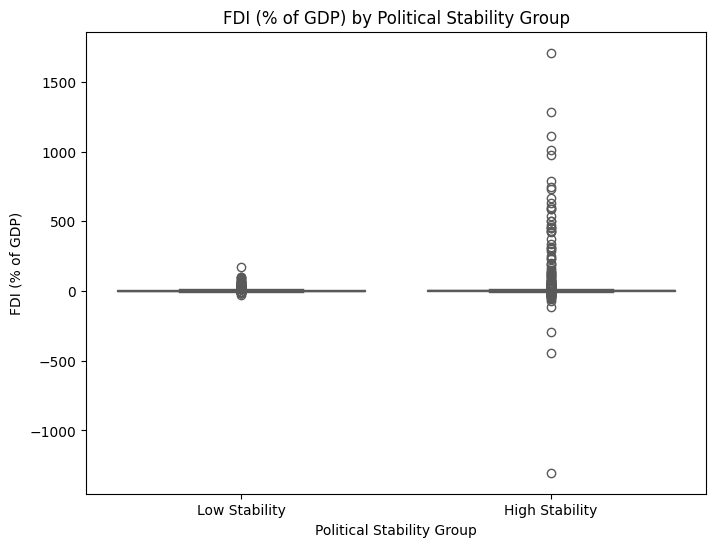

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Stability_Group', y='FDI', data=merged_df, palette='Set2')
plt.title('FDI (% of GDP) by Political Stability Group')
plt.xlabel('Political Stability Group')
plt.ylabel('FDI (% of GDP)')
plt.show()


This boxplot compares the distribution of Foreign Direct Investment (FDI) (% of GDP) for countries grouped by their political stability (High vs. Low). The plot clearly shows that countries with High Stability tend to have a higher median FDI compared to countries with Low Stability. Additionally, the High Stability group exhibits a wider spread of FDI values and a significantly larger number of high outliers, indicating that while political stability is associated with higher FDI, other factors contribute to exceptionally high investment in some stable countries.

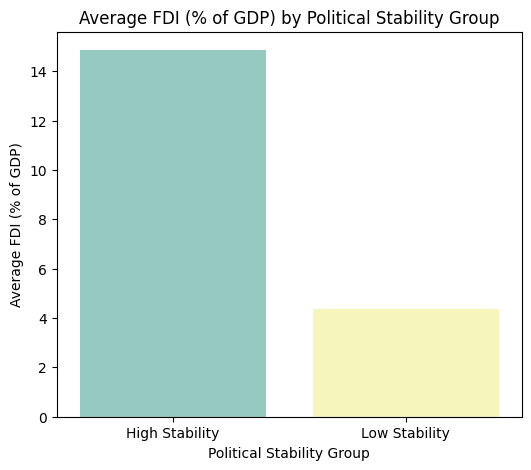

In [39]:
avg_fdi = merged_df.groupby('Stability_Group')['FDI'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x='Stability_Group', y='FDI', data=avg_fdi, palette='Set3')
plt.title('Average FDI (% of GDP) by Political Stability Group')
plt.ylabel('Average FDI (% of GDP)')
plt.xlabel('Political Stability Group')
plt.show()


## Summary of Findings

Based on the data analysis performed:

*   **Data Distribution and Outliers:** The distributions of both Political Stability and FDI (% of GDP) show variations, with the FDI data being heavily skewed to the right and containing significant outliers, indicating that while most countries have relatively low FDI, a few attract exceptionally high levels of foreign investment.
*   **Correlation:** The correlation analysis showed a weak positive correlation between Political Stability and FDI (% of GDP) across all countries and years in the dataset. This suggests a tendency for higher political stability to be associated with higher FDI, but the relationship is not strong or consistently linear.
*   **Time Series Trends:** The time series plots of average Political Stability and FDI over time show fluctuations in both variables. While there isn't a perfectly aligned trend, there are periods where both average stability and FDI show similar movements, and other periods where they diverge.
*   **Comparative Analysis by Stability Group:** Comparing FDI between countries grouped by High and Low Political Stability reveals a notable difference. Countries with higher political stability, on average, attract significantly more foreign direct investment than those with lower stability. The boxplot also highlights greater variability and the presence of high outliers in FDI within the high stability group.

**Overall Interpretation:**

While the overall correlation is weak, the comparative analysis by political stability group suggests that political stability does play a role in attracting foreign direct investment, with more stable countries generally receiving higher average FDI. However, the presence of outliers and the less clear pattern in the overall time series indicate that other factors also significantly influence FDI inflows. The relationship is likely complex and may be influenced by a combination of political, economic, and social factors.